In [14]:
import matplotlib.pyplot as plt
import numpy as np

import sys
import os

script_directory = os.path.abspath(os.path.join('..', 'evaluation'))
sys.path.append(script_directory)

from prediction_reader import score_result

In [15]:
def multi_boxplot(data, xlabel, ylabel, xticks, labels, location, save_figure=None, ylim=None):
    
    plt.rcParams.update({"font.size": 12, "font.family": "serif", "font.serif": ["NewComputerModern10"]})
    # plt.rcParams.update({'font.size': 12, 'font.family': 'sans-serif'})

    plt.figure(figsize=(6, 3))

    # colour_scheme = ['lightblue', 'orange', 'mediumseagreen', 'orchid']
    colour_scheme = ['#52B297', '#8E4A93', '#009EE7', '#EF766E']

    # Set the width of each box
    box_width = 0.2


    for i in range(len(data)):
        boxprops = dict(linestyle='-', linewidth=1, color='black', facecolor=colour_scheme[i])
        medianprops = dict(linestyle='--', linewidth=1, color='none')
        meanprops = dict(linestyle='-', linewidth=1, color='black')

        plt.boxplot(data[i], positions=np.arange(len(data[i])) + i * box_width, widths=box_width, patch_artist=True,
                    boxprops=boxprops, showmeans=True, meanline=True, medianprops=medianprops, meanprops=meanprops, label=labels[i])


    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    central_positions = np.arange(len(data[0])) + (len(data) * box_width / 2) - (box_width / 2)
    plt.xticks(central_positions, xticks)
    
    if ylim is not None:
        plt.ylim(-0.005, ylim)
    
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    if location is not None:
        plt.legend(loc=location)
        # plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=len(data), frameon=False)

    if save_figure is not None:
        os.makedirs('figures', exist_ok=True)
        plt.savefig(f'figures/{save_figure}.eps', format='eps')

    
    plt.show()


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


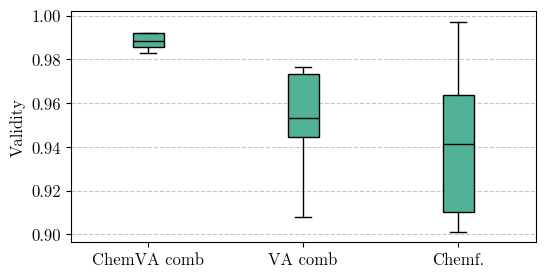

In [16]:
# Validity plot

VA_comb = [0.9763157894736842, 0.9723684210526315, 0.9078947368421053, 0.9567567567567568]

'''
Validity: 0.953 +/- 0.001
Mean number of SMILES per drug: 16.117 +/- 0.161 / 20

Total identified metabolites: 24 / 271
Total number of predictions: 2434
'''

chemVA_comb = [0.9921052631578947, 0.9828947368421053, 0.9868421052631579, 0.9918918918918919]

'''
Validity: 0.988 +/- 0.000
Mean number of SMILES per drug: 14.461 +/- 0.085 / 20

Total identified metabolites: 37 / 271
Total number of predictions: 2184
'''

chemf_comb = [0.9131578947368421, 0.9013157894736842, 0.9526315789473684, 0.9972972972972973]

'''
Validity: 0.941 +/- 0.002
Mean number of SMILES per drug: 2.247 +/- 0.298 / 20

Total identified metabolites: 0 / 271
Total number of predictions: 340
'''

comb = [chemVA_comb, VA_comb, chemf_comb]

data = [comb]

xlabel = None
ylabel = 'Validity'
xticks = ['ChemVA comb', 'VA comb', 'Chemf.']
labels = ['comb', 'rand', 'base', 'mask']

multi_boxplot(data, xlabel, ylabel, xticks, labels, None, 'validity')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


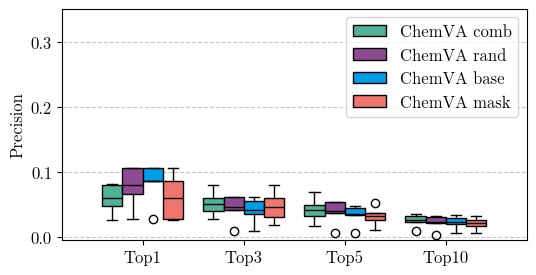

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


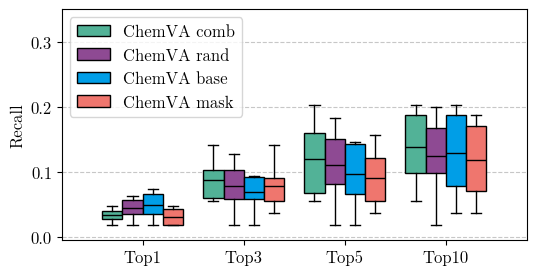

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


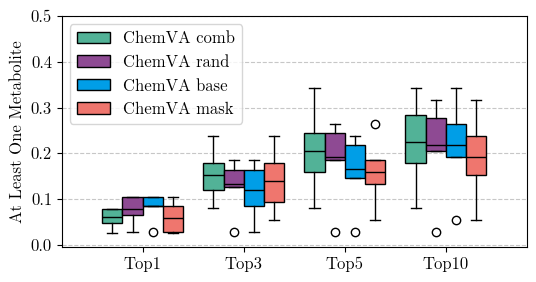

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


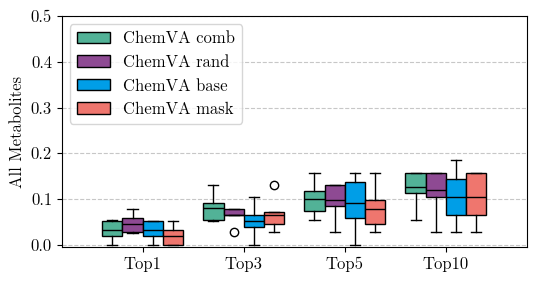

In [17]:
bs = 4

recall_comb, precision_comb, score1_comb, score_all_comb = score_result('../evaluation/alohomora/result_chemVA_comb.csv', bs, False)
recall_rand, precision_rand, score1_rand, score_all_rand = score_result('../evaluation/alohomora/result_chemVA_rand.csv', bs, False)
recall_base, precision_base, score1_base, score_all_base = score_result('../evaluation/alohomora/result_chemVA_base.csv', bs, False)
recall_mask, precision_mask, score1_mask, score_all_mask = score_result('../evaluation/alohomora/result_chemVA_mask.csv', bs, False)

data = [precision_comb, precision_rand, precision_base, precision_mask]

xlabel = None
ylabel = 'Precision'
xticks = ['Top1', 'Top3', 'Top5', 'Top10']
labels = ['ChemVA comb', 'ChemVA rand', 'ChemVA base', 'ChemVA mask']

multi_boxplot(data, xlabel, ylabel, xticks, labels, 'upper right', 'precision_chemVA', 0.35)

data = [recall_comb, recall_rand, recall_base, recall_mask]

xlabel = None
ylabel = 'Recall'
xticks = ['Top1', 'Top3', 'Top5', 'Top10']
labels = ['ChemVA comb', 'ChemVA rand', 'ChemVA base', 'ChemVA mask']

multi_boxplot(data, xlabel, ylabel, xticks, labels, 'upper left', 'recall_chemVA', 0.35)

data = [score1_comb[0:4], score1_rand[0:4], score1_base[0:4], score1_mask[0:4]]

xlabel = None
ylabel = 'At Least One Metabolite'
xticks = ['Top1', 'Top3', 'Top5', 'Top10']#, 'All']
labels = ['ChemVA comb', 'ChemVA rand', 'ChemVA base', 'ChemVA mask']

multi_boxplot(data, xlabel, ylabel, xticks, labels, 'upper left', 'at_least_chemVA', 0.5)

data = [score_all_comb[0:4], score_all_rand[0:4], score_all_base[0:4], score_all_mask[0:4]]

xlabel = None
ylabel = 'All Metabolites'
xticks = ['Top1', 'Top3', 'Top5', 'Top10']#, 'All']
labels = ['ChemVA comb', 'ChemVA rand', 'ChemVA base', 'ChemVA mask']

multi_boxplot(data, xlabel, ylabel, xticks, labels, 'upper left', 'all_chemVA', 0.5)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


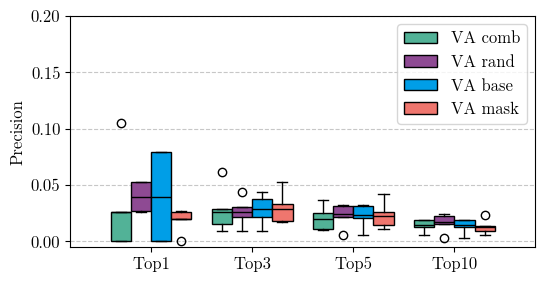

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


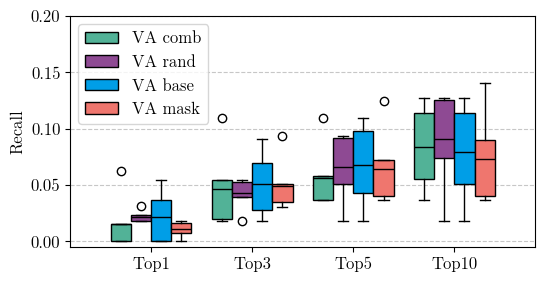

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


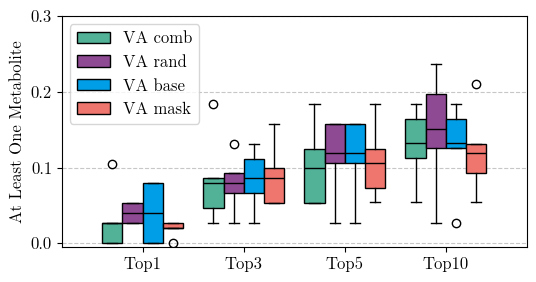

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


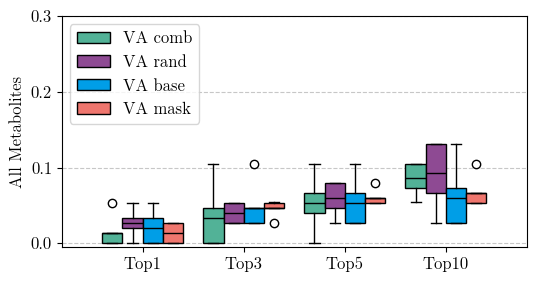

In [18]:
bs = 4

recall_comb, precision_comb, score1_comb, score_all_comb = score_result('../evaluation/alohomora/result_VA_comb.csv', bs, False)
recall_rand, precision_rand, score1_rand, score_all_rand = score_result('../evaluation/alohomora/result_VA_rand.csv', bs, False)
recall_base, precision_base, score1_base, score_all_base = score_result('../evaluation/alohomora/result_VA_base.csv', bs, False)
recall_mask, precision_mask, score1_mask, score_all_mask = score_result('../evaluation/alohomora/result_VA_mask.csv', bs, False)

data = [precision_comb, precision_rand, precision_base, precision_mask]

xlabel = None
ylabel = 'Precision'
xticks = ['Top1', 'Top3', 'Top5', 'Top10']
labels = ['VA comb', 'VA rand', 'VA base', 'VA mask']

multi_boxplot(data, xlabel, ylabel, xticks, labels, 'upper right', 'precision_VA', 0.2)

data = [recall_comb, recall_rand, recall_base, recall_mask]

xlabel = None
ylabel = 'Recall'
xticks = ['Top1', 'Top3', 'Top5', 'Top10']
labels = ['VA comb', 'VA rand', 'VA base', 'VA mask']

multi_boxplot(data, xlabel, ylabel, xticks, labels, 'upper left', 'recall_VA', 0.2)

data = [score1_comb[0:4], score1_rand[0:4], score1_base[0:4], score1_mask[0:4]]

xlabel = None
ylabel = 'At Least One Metabolite'
xticks = ['Top1', 'Top3', 'Top5', 'Top10']#, 'All']
labels = ['VA comb', 'VA rand', 'VA base', 'VA mask']

multi_boxplot(data, xlabel, ylabel, xticks, labels, 'upper left', 'at_least_VA', 0.3)

data = [score_all_comb[0:4], score_all_rand[0:4], score_all_base[0:4], score_all_mask[0:4]]

xlabel = None
ylabel = 'All Metabolites'
xticks = ['Top1', 'Top3', 'Top5', 'Top10']#, 'All']
labels = ['VA comb', 'VA rand', 'VA base', 'VA mask']

multi_boxplot(data, xlabel, ylabel, xticks, labels, 'upper left', 'all_VA', 0.3)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


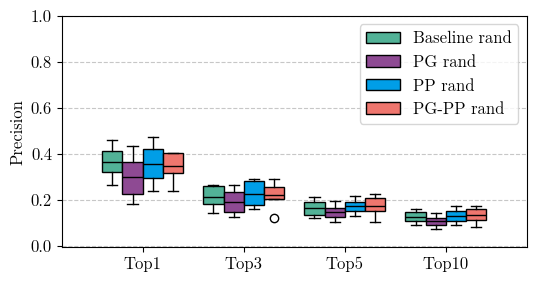

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


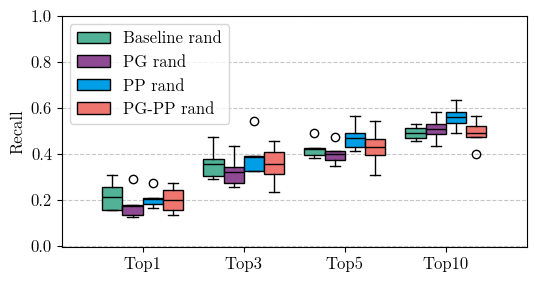

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


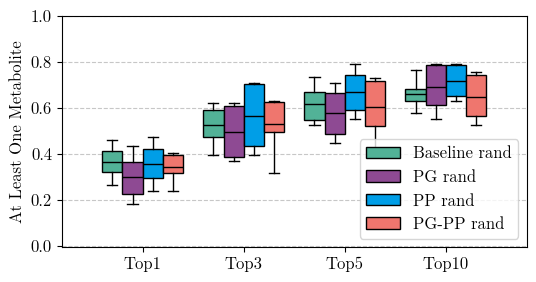

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


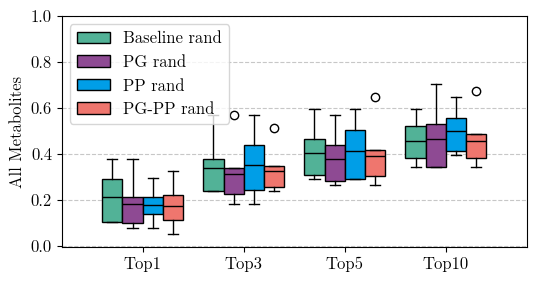

In [25]:
bs = 4

recall_baseline_05, precision_baseline_05, score1_baseline_05, score_all_baseline_05 = score_result('../evaluation/alohomora/result_base_rand.csv', bs, False)
recall_PG, precision_PG, score1_PG, score_all_PG = score_result('../evaluation/alohomora/result_PG_rand.csv', bs, False)
recall_PP, precision_PP, score1_PP, score_all_PP = score_result('../evaluation/alohomora/result_PP_rand.csv', bs, False)
recall_PG_PP, precision_PG_PP, score1_PG_PP, score_all_PG_PP = score_result('../evaluation/alohomora/result_PG-PP_rand.csv', bs, False)

data = [precision_baseline_05[0:4], precision_PG[0:4], precision_PP[0:4], precision_PG_PP[0:4]]

xlabel = None
ylabel = 'Precision'
xticks = ['Top1', 'Top3', 'Top5', 'Top10']
labels = ['Baseline rand', 'PG rand', 'PP rand', 'PG-PP rand']

multi_boxplot(data, xlabel, ylabel, xticks, labels, 'upper right', 'precision_added_data', 1)

data = [recall_baseline_05[0:4], recall_PG[0:4], recall_PP[0:4], recall_PG_PP[0:4]]

xlabel = None
ylabel = 'Recall'
xticks = ['Top1', 'Top3', 'Top5', 'Top10']
labels = ['Baseline rand', 'PG rand', 'PP rand', 'PG-PP rand']

multi_boxplot(data, xlabel, ylabel, xticks, labels, 'upper left', 'recall_added_data', 1)

data = [score1_baseline_05[0:4], score1_PG[0:4], score1_PP[0:4], score1_PG_PP[0:4]]

xlabel = None
ylabel = 'At Least One Metabolite'
xticks = ['Top1', 'Top3', 'Top5', 'Top10']#, 'All']
labels = ['Baseline rand', 'PG rand', 'PP rand', 'PG-PP rand']

multi_boxplot(data, xlabel, ylabel, xticks, labels, 'lower right', 'at_least_added_data', 1)

data = [score_all_baseline_05[0:4], score_all_PG[0:4], score_all_PP[0:4], score_all_PG_PP[0:4]]

xlabel = None
ylabel = 'All Metabolites'
xticks = ['Top1', 'Top3', 'Top5', 'Top10']#, 'All']
labels = ['Baseline rand', 'PG rand', 'PP rand', 'PG-PP rand']

multi_boxplot(data, xlabel, ylabel, xticks, labels, 'upper left', 'all_added_data', 1)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


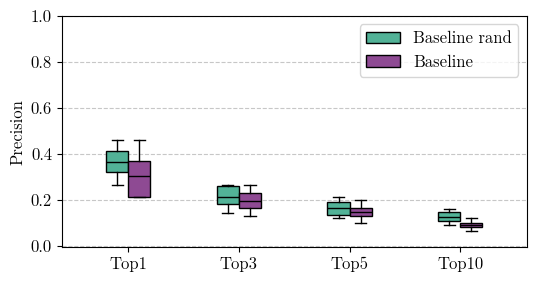

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


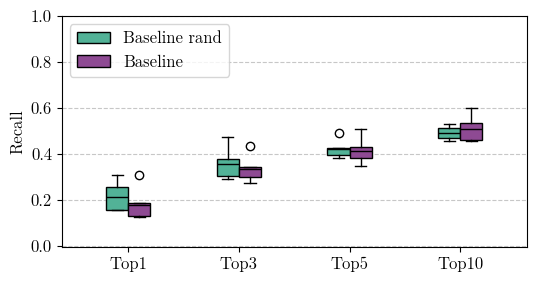

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


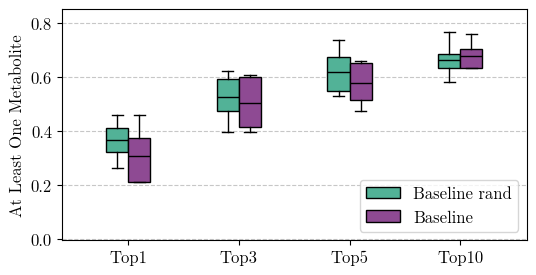

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


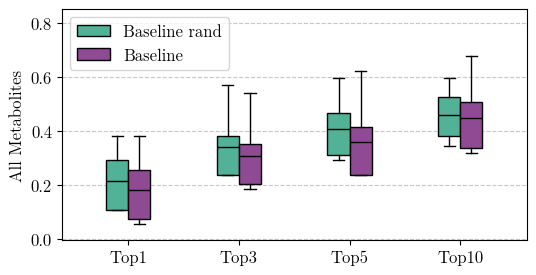

In [20]:
bs = 4

recall_baseline_05, precision_baseline_05, score1_baseline_05, score_all_baseline_05 = score_result('../evaluation/alohomora/result_base_rand.csv', bs, False)
recall_baseline, precision_baseline, score1_baseline, score_all_baseline = score_result('../evaluation/alohomora/result_base.csv', bs, False)

data = [precision_baseline_05[0:4], precision_baseline[0:4]]

xlabel = None
ylabel = 'Precision'
xticks = ['Top1', 'Top3', 'Top5', 'Top10']
labels = ['Baseline rand', 'Baseline']

multi_boxplot(data, xlabel, ylabel, xticks, labels, 'upper right', 'precision_baseline', 1)

data = [recall_baseline_05[0:4], recall_baseline[0:4]]

xlabel = None
ylabel = 'Recall'
xticks = ['Top1', 'Top3', 'Top5', 'Top10']
labels = ['Baseline rand', 'Baseline']

multi_boxplot(data, xlabel, ylabel, xticks, labels, 'upper left', 'recall_baseline', 1)

data = [score1_baseline_05[0:4], score1_baseline[0:4]]

xlabel = None
ylabel = 'At Least One Metabolite'
xticks = ['Top1', 'Top3', 'Top5', 'Top10']#, 'All']
labels = ['Baseline rand', 'Baseline']

multi_boxplot(data, xlabel, ylabel, xticks, labels, 'lower right', 'at_least_baseline', 0.85)

data = [score_all_baseline_05[0:4], score_all_baseline[0:4]]

xlabel = None
ylabel = 'All Metabolites'
xticks = ['Top1', 'Top3', 'Top5', 'Top10']#, 'All']
labels = ['Baseline rand', 'Baseline']

multi_boxplot(data, xlabel, ylabel, xticks, labels, 'upper left', 'all_baseline', 0.85)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


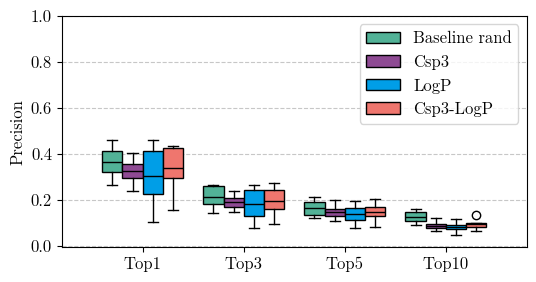

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


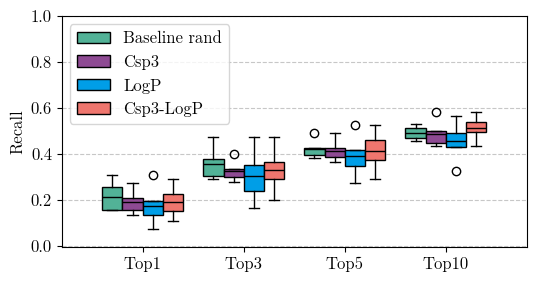

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


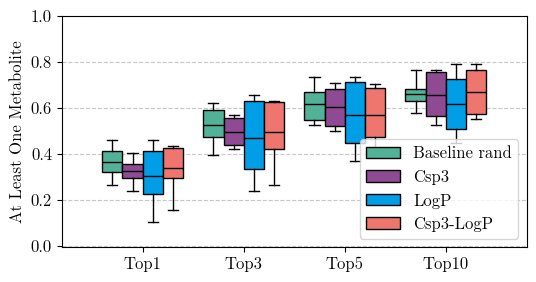

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


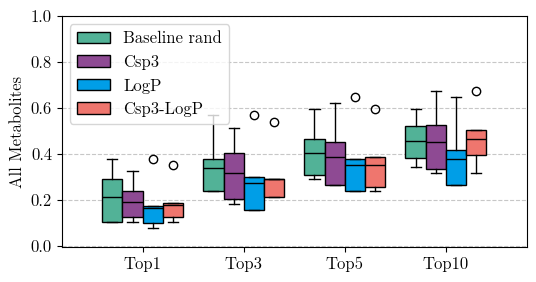

In [21]:
bs = 4

recall_baseline_05, precision_baseline_05, score1_baseline_05, score_all_baseline_05 = score_result('../evaluation/alohomora/result_base_rand.csv', bs, False)
recall_csp3, precision_csp3, score1_csp3, score_all_csp3 = score_result('../evaluation/final/result_csp3.csv', bs, False)
recall_logp, precision_logp, score1_logp, score_all_logp = score_result('../evaluation/alohomora/result_logp.csv', bs, False)
recall_csp3_logp, precision_csp3_logp, score1_csp3_logp, score_all_csp3_logp = score_result('../evaluation/alohomora/result_logp-csp3.csv', bs, False)

data = [precision_baseline_05[0:4], precision_csp3[0:4], precision_logp[0:4], precision_csp3_logp[0:4]]

xlabel = None
ylabel = 'Precision'
xticks = ['Top1', 'Top3', 'Top5', 'Top10']
labels = ['Baseline rand', 'Csp3', 'LogP', 'Csp3-LogP']

multi_boxplot(data, xlabel, ylabel, xticks, labels, 'upper right', 'precision_annot_data', 1)

data = [recall_baseline_05[0:4], recall_csp3[0:4], recall_logp[0:4], recall_csp3_logp[0:4]]

xlabel = None
ylabel = 'Recall'
xticks = ['Top1', 'Top3', 'Top5', 'Top10']
labels = ['Baseline rand', 'Csp3', 'LogP', 'Csp3-LogP']

multi_boxplot(data, xlabel, ylabel, xticks, labels, 'upper left', 'recall_annot_data', 1)

data = [score1_baseline_05[0:4], score1_csp3[0:4], score1_logp[0:4], score1_csp3_logp[0:4]]

xlabel = None
ylabel = 'At Least One Metabolite'
xticks = ['Top1', 'Top3', 'Top5', 'Top10']#, 'All']
labels = ['Baseline rand', 'Csp3', 'LogP', 'Csp3-LogP']

multi_boxplot(data, xlabel, ylabel, xticks, labels, 'lower right', 'at_least_annot_data', 1)

data = [score_all_baseline_05[0:4], score_all_csp3[0:4], score_all_logp[0:4], score_all_csp3_logp[0:4]]

xlabel = None
ylabel = 'All Metabolites'
xticks = ['Top1', 'Top3', 'Top5', 'Top10']#, 'All']
labels = ['Baseline rand', 'Csp3', 'LogP', 'Csp3-LogP']

multi_boxplot(data, xlabel, ylabel, xticks, labels, 'upper left', 'all_annot_data', 1)

In [22]:
bs = 5

recall_e1, precision_e1, score1_e1, score_all_e1 = score_result('../evaluation/ensemble/result_split1_v0_mc_aug_10.csv', bs, False)
recall_e2, precision_e2, score1_e2, score_all_e2 = score_result('../evaluation/ensemble/result_split2_v0_mc_aug_10.csv', bs, False)
recall_e3, precision_e3, score1_e3, score_all_e3 = score_result('../evaluation/ensemble/result_split3_v0_mc_aug_10.csv', bs, False)
recall_e4, precision_e4, score1_e4, score_all_e4 = score_result('../evaluation/ensemble/result_split4_v0_mc_aug_10.csv', bs, False)

data = [score_all_e1, score_all_e2, score_all_e3, score_all_e4]

xlabel = None
ylabel = 'All Metabolites'
xticks = ['Top1', 'Top3', 'Top5', 'Top10', 'All']
labels = ['Split 1', 'Split 2', 'Split 3', 'Split 4']

# multi_boxplot(data, xlabel, ylabel, xticks, labels, 'upper left')

In [23]:
_, _, bs32_one, bs32_all = score_result('../evaluation/result/result_version44_chemf_mmp_comb_0.5.csv', 5, False)
recall_bs19, precision_bs19, score1_bs19, score_all_bs19 = score_result('../evaluation/result/result_test_bs19.csv', 8, False)
recall_bs38, precision_bs38, score1_bs38, score_all_bs38 = score_result('../evaluation/result/result_test_bs38.csv', 4, False)

data = [score_all_bs19, score_all_bs38, bs32_all]

xlabel = None
ylabel = 'All Metabolites'
xticks = ['Top1', 'Top3', 'Top5', 'Top10', 'All']
labels = ['BS 19', 'BS 38', 'BS 32']

# multi_boxplot(data, xlabel, ylabel, xticks, labels, 'upper left')